# Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import json


# Path

In [9]:
train_path1 = "/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_training_challenges.json"
train_path2 = "/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_training_solutions.json"

# Data Exploration

In [34]:
with open(train_path1, 'r') as f:
    data_dict = json.load(f)

In [61]:
data_dict.keys()

dict_keys(['007bbfb7', '00d62c1b', '017c7c7b', '025d127b', '045e512c', '0520fde7', '05269061', '05f2a901', '06df4c85', '08ed6ac7', '09629e4f', '0962bcdd', '0a938d79', '0b148d64', '0ca9ddb6', '0d3d703e', '0dfd9992', '0e206a2e', '10fcaaa3', '11852cab', '1190e5a7', '137eaa0f', '150deff5', '178fcbfb', '1a07d186', '1b2d62fb', '1b60fb0c', '1bfc4729', '1c786137', '1caeab9d', '1cf80156', '1e0a9b12', '1e32b0e9', '1f0c79e5', '1f642eb9', '1f85a75f', '1f876c06', '1fad071e', '2013d3e2', '2204b7a8', '22168020', '22233c11', '2281f1f4', '228f6490', '22eb0ac0', '234bbc79', '23581191', '239be575', '23b5c85d', '253bf280', '25d487eb', '25d8a9c8', '25ff71a9', '264363fd', '272f95fa', '27a28665', '28bf18c6', '28e73c20', '29623171', '29c11459', '29ec7d0e', '2bcee788', '2bee17df', '2c608aff', '2dc579da', '2dd70a9a', '2dee498d', '31aa019c', '321b1fc6', '32597951', '3345333e', '3428a4f5', '3618c87e', '3631a71a', '363442ee', '36d67576', '36fdfd69', '3906de3d', '39a8645d', '39e1d7f9', '3aa6fb7a', '3ac3eb23', '3af2

In [63]:
data_dict["007bbfb7"]

{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
   'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
  {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
   'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 4, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 4, 0, 0, 0, 0]]},
  {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]],
   'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 2],


# Visualize

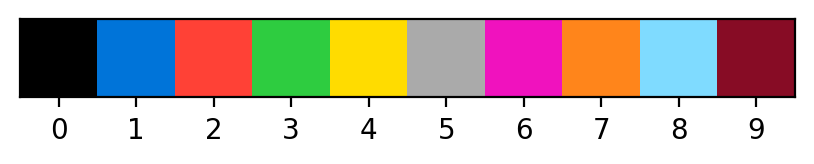

In [22]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

norm = colors.Normalize(vmin=0, vmax=9)
color_list = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]

# ......................................................................................................
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

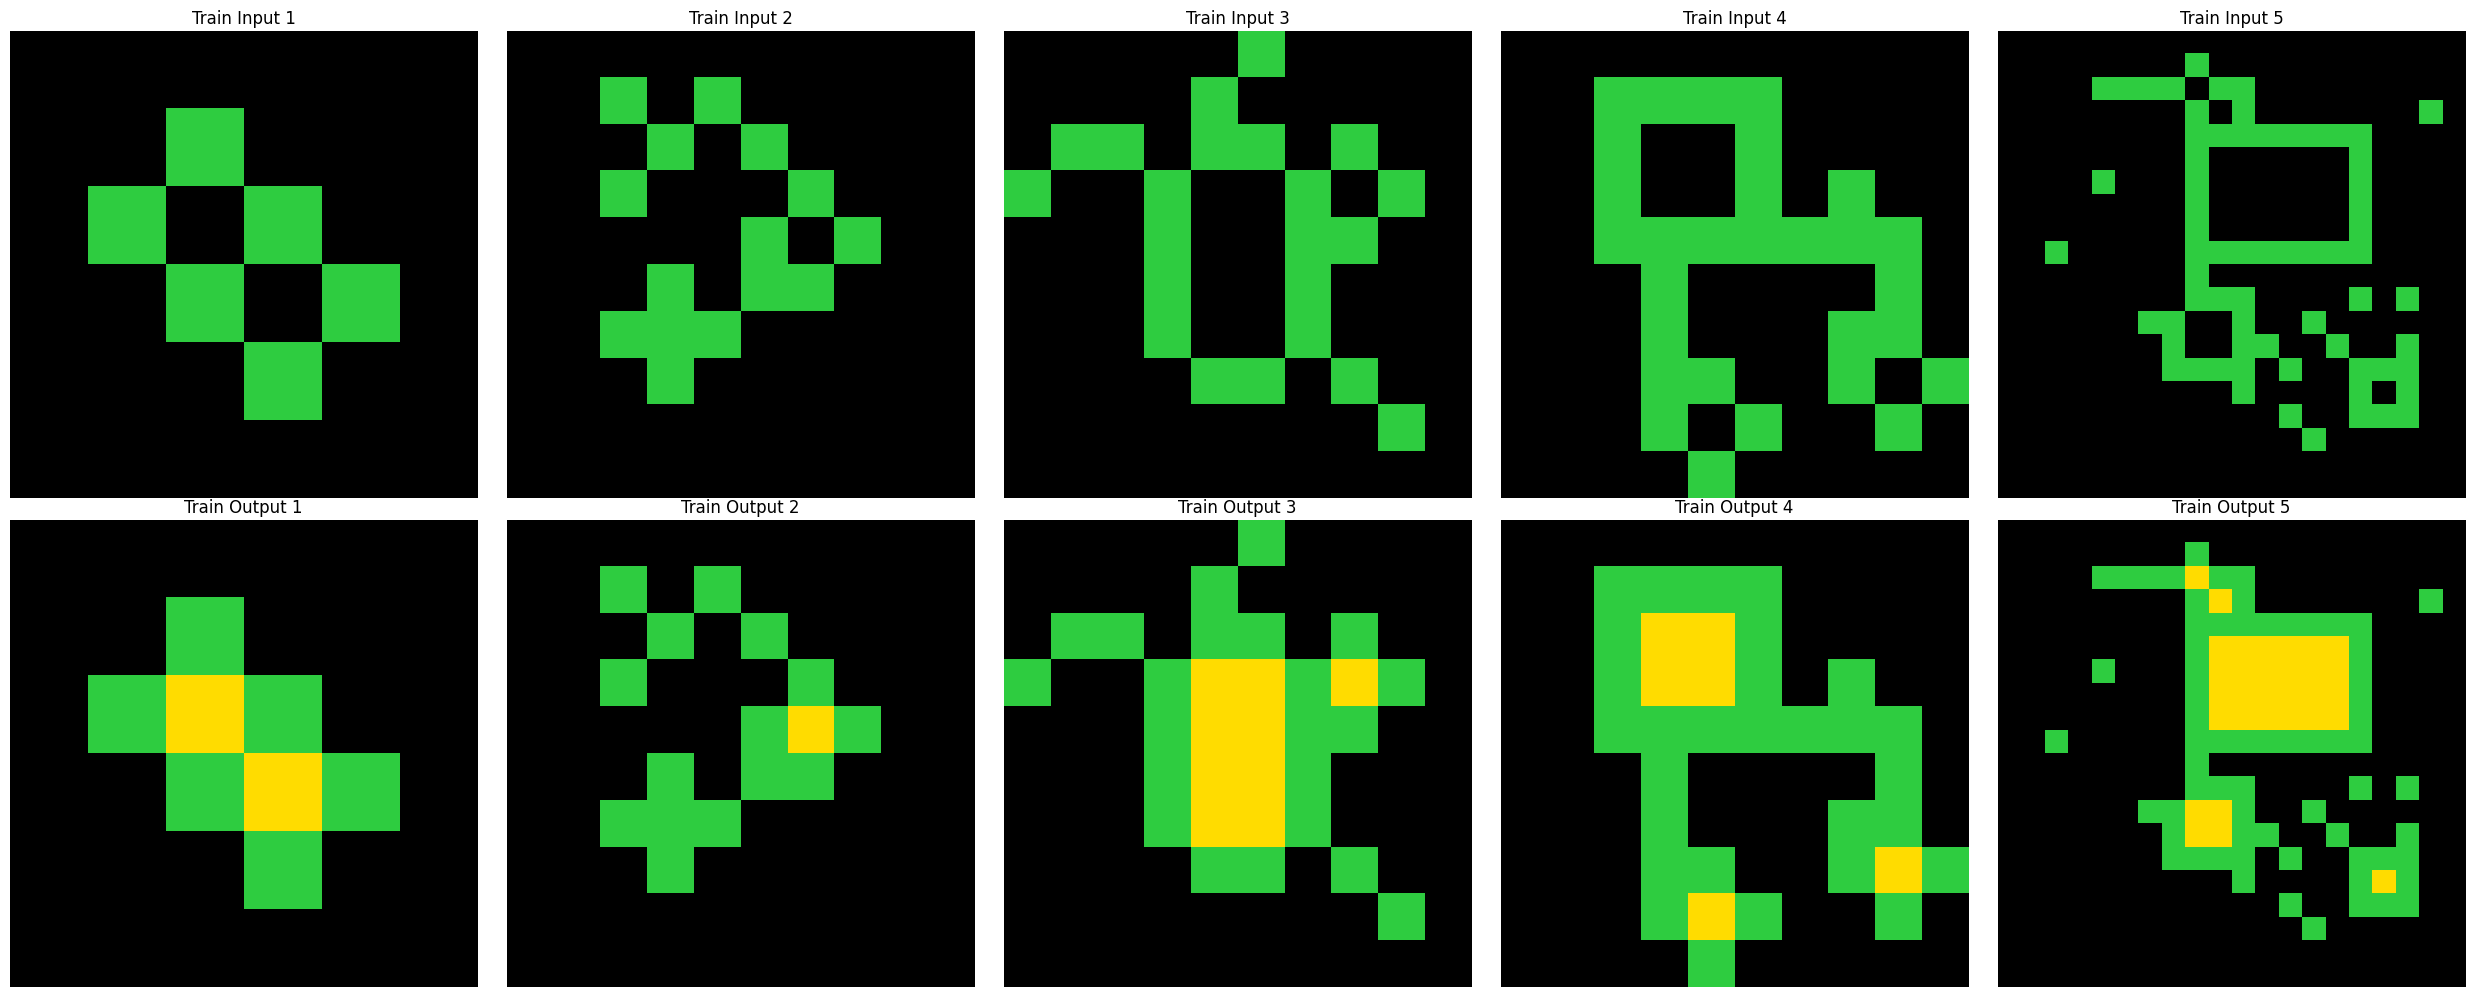

In [65]:
# Function to plot the data
def plot_data(data, title, cmap, norm, ax):
    ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.axis('off')

# Extract the first element and plot all inputs and outputs
key = "00d62c1b"
test_data = data_dict[key]["test"]
train_data = data_dict[key]["train"]


# Determine the number of columns needed
num_columns = max(len(test_data), len(train_data))

# Create subplots
fig, axes = plt.subplots(2, num_columns, figsize=(num_columns * 5, 10))

# Plot train inputs and outputs side by side
for i, train in enumerate(train_data):
    plot_data(train["input"], f"Train Input {i+1}", cmap, norm, axes[0, i])
    if "output" in train:
        plot_data(train["output"], f"Train Output {i+1}", cmap, norm, axes[1, i])


# Remove empty subplots
for i in range(num_columns, 2):
    axes[0, i].axis('off')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()